In [2]:
import json # citire fisier
import gensim.downloader as api # word2vec pretrained
import numpy as np # X
import scipy.cluster.hierarchy as shc # hierarchical clustering
import matplotlib.pyplot as plt # vizualizare dendograma
import pandas as pd # date tensorboard
import os # tensorboard
import tensorflow as tf # tensorboard
from sklearn.decomposition import PCA as sklearnPCA # transformate date pentru tensorboard
from pyclustering.cluster.dbscan import dbscan

In [2]:
sentences = []
with open('../fos_list_reduced_5.txt', 'r') as f:
    sentences = json.loads(f.read())
print(len(sentences))

10148


In [3]:
model = api.load('glove-wiki-gigaword-100')

In [4]:
X = []
wrong_words = 0
total_words = 0

new_sentences = []

for sentence in sentences:
    word_vector = []
    new_sentence = []
    
    for word in sentence:
        total_words += 1
        try:
            word_vector.append(model[word])
            new_sentence.append(word)
        except:
            wrong_words += 1
    leng = len(word_vector)
      
    if (leng > 0):
        avg_vect = np.zeros(100)  
        X.append(avg_vect)
        for elem in word_vector:
            for i in range(0,100):
                avg_vect[i] += elem[i]
        
        if (leng != 1):
            for i in range(0,100):
                avg_vect[i] /= leng 
            
        new_sentences.append(new_sentence)

In [ ]:
print(len(new_sentences))
print(wrong_words)
print(total_words)

8117
2166
10923


In [ ]:
X = np.array(X)
np.save('X.npy', X) 

In [3]:
X = np.load('X.npy')

# Apply Hierachical Clustering

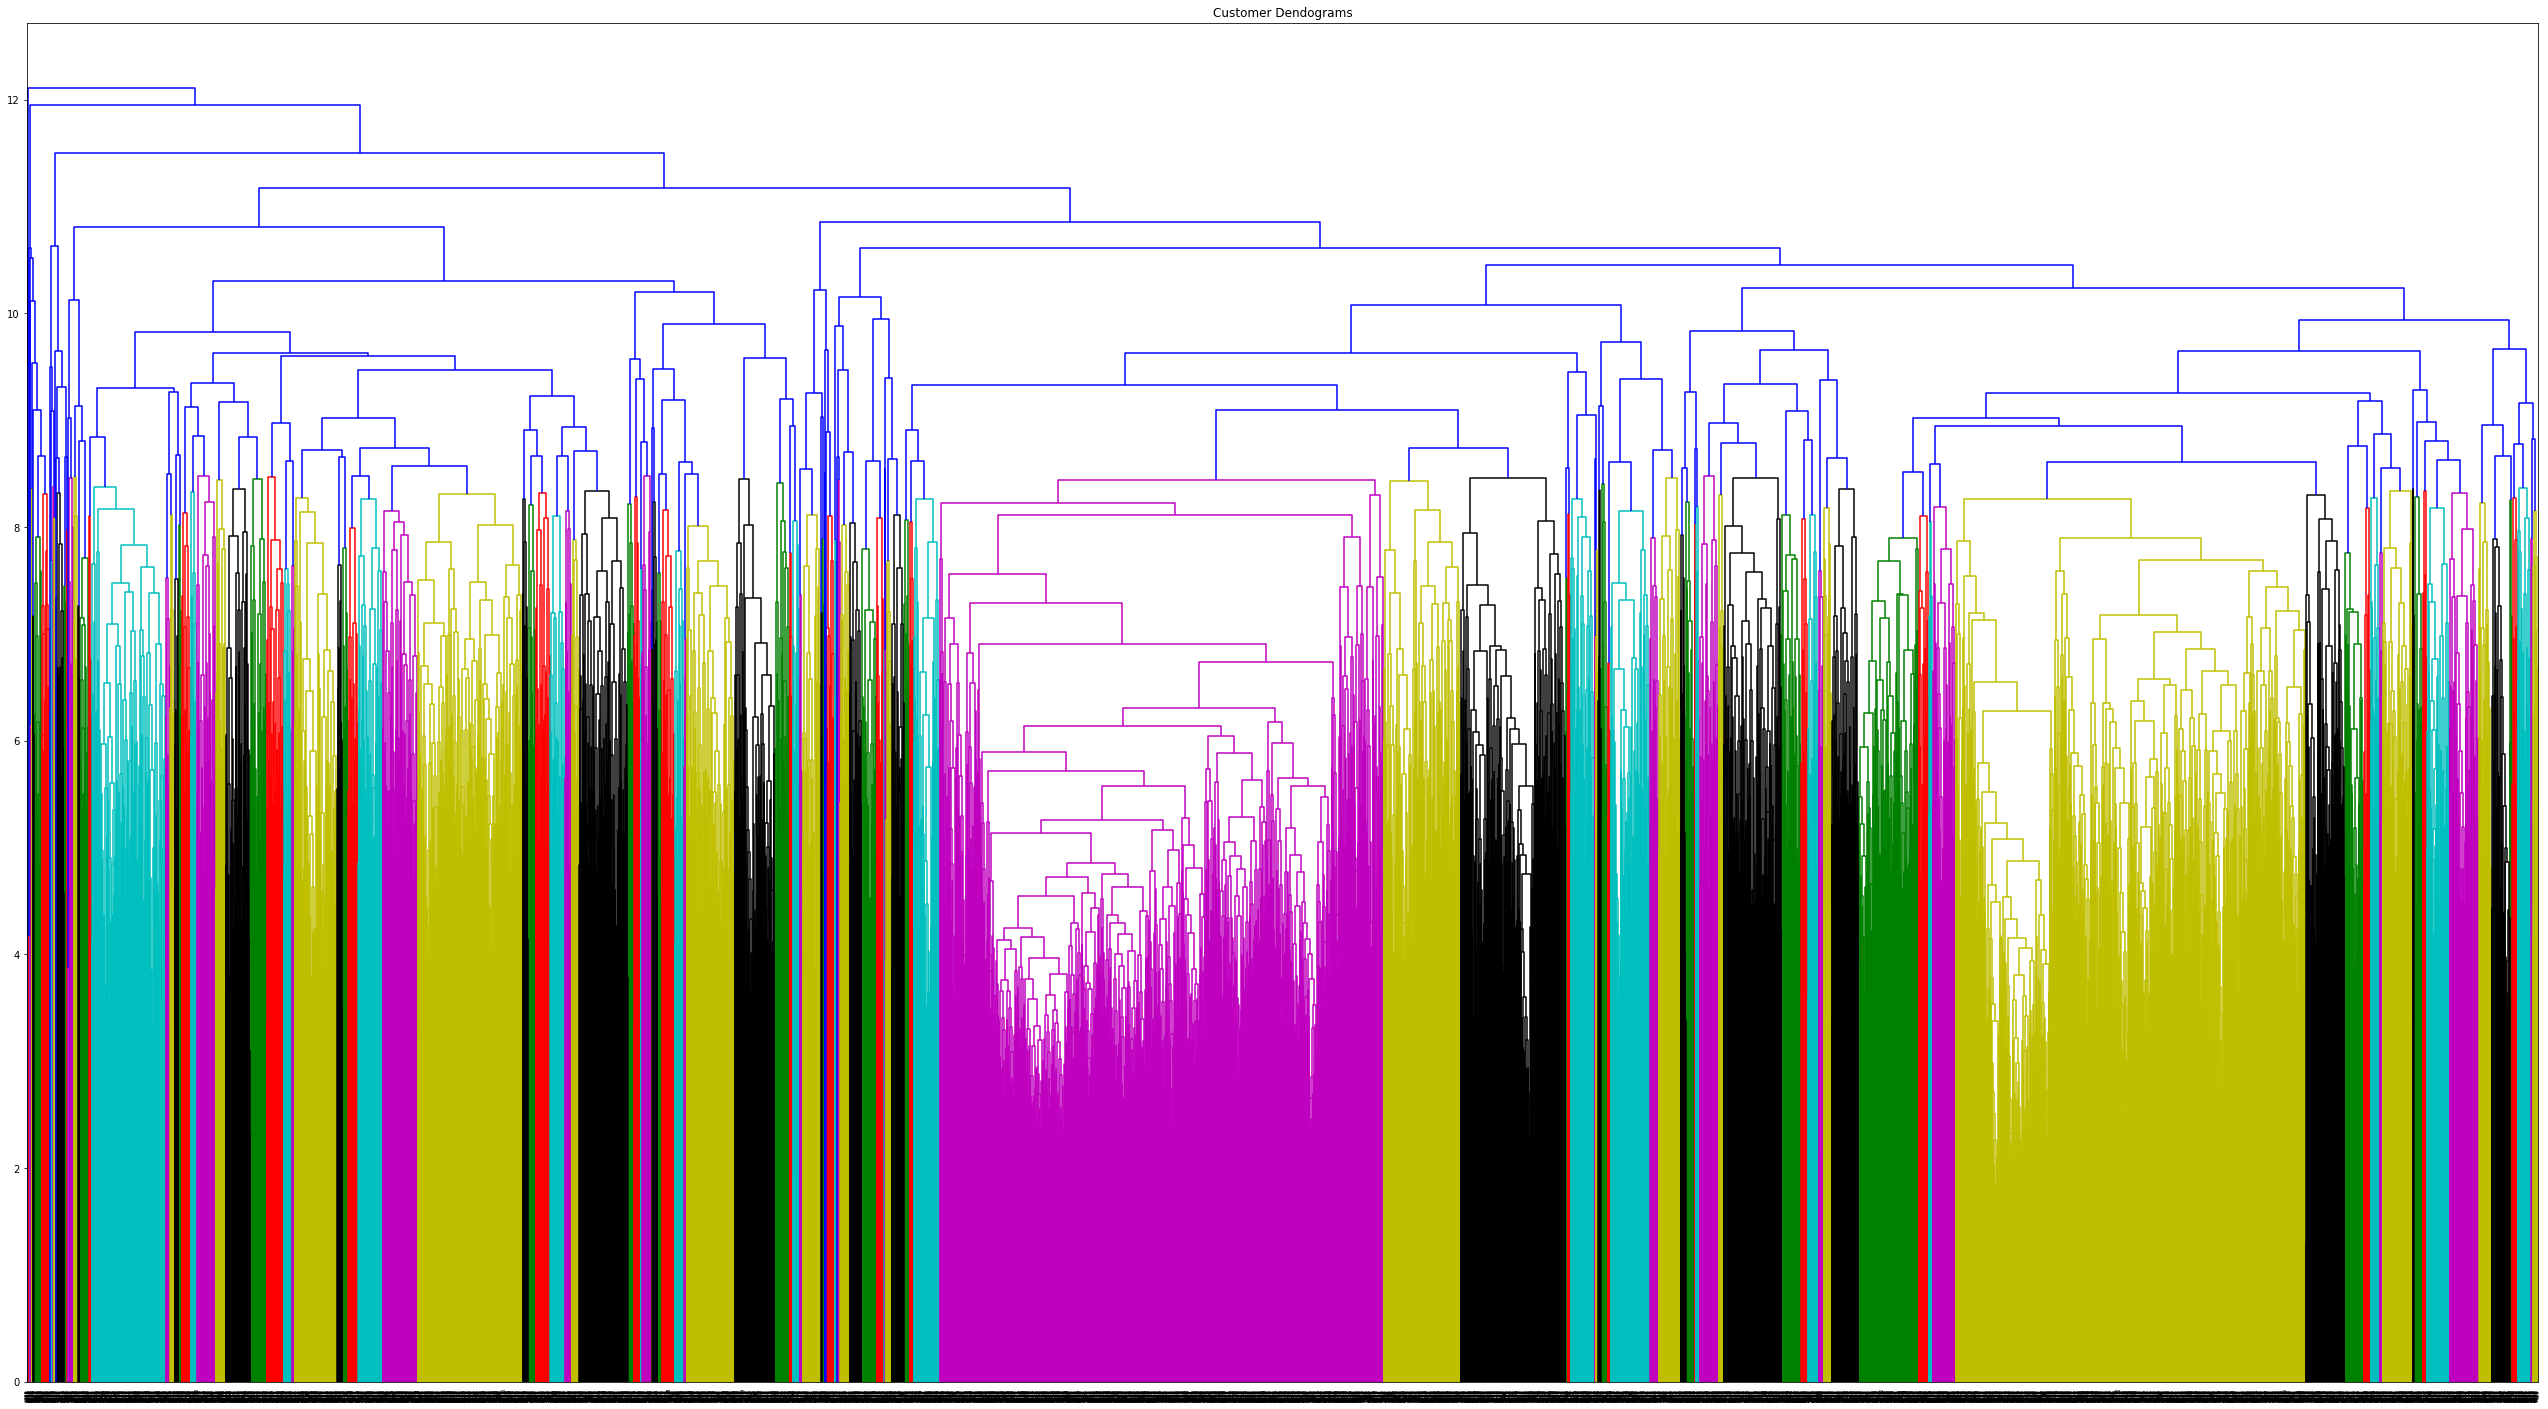

In [10]:
data = X
max_d = 50

plt.figure(figsize=(45, 25))  
plt.title("Customer Dendograms")  
plt.axhline(y=max_d, c='k')
Z = shc.linkage(data, method='complete')
dend = shc.dendrogram(Z)  

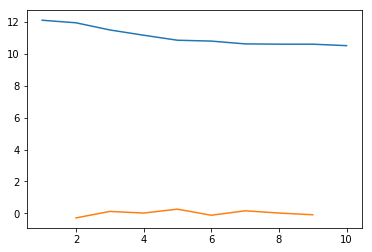

clusters: 5


In [11]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(n_samples=500,
#                   n_features=2,
#                   centers=4,
#                   cluster_std=1,
#                   center_box=(-10.0, 10.0),
#                   shuffle=True,
#                   random_state=1)  # For reproducibility

range_n_clusters = [22, 23, 24,25, 26]

for n_clusters in range(500,505):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [21]:
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.silhouette import silhouette_ksearch_type, silhouette_ksearch
from pyclustering.samples.definitions import FCPS_SAMPLES

sample = X

search_instance = silhouette_ksearch(sample, 20, 100, algorithm=silhouette_ksearch_type.KMEANS).process()
amount = search_instance.get_amount()
scores = search_instance.get_scores()
print("Scores: '%s'" % str(scores))
initial_centers = kmeans_plusplus_initializer(sample, amount).initialize()
kmeans_instance = kmeans(sample, initial_centers).process()
clusters = kmeans_instance.get_clusters()

Scores: '[-0.030226800520492918, -0.03222008373887119, -0.022471851569352164, -0.027421076724119912, -0.018621378684048714, -0.015046029933197676, -0.024637220519355248, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]'


AttributeError: Amount of cluster centers '0' should be at least 1 and should be less or equal to amount of points in data.

In [22]:
from pyclustering.cluster.elbow import elbow

# read sample 'Simple3' from file (sample contains four clusters)
#sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE3)
sample= X
# create instance of Elbow method using K value from 1 to 10.
kmin, kmax = 1, 30
elbow_instance = elbow(sample, kmin, kmax)
# process input data and obtain results of analysis
elbow_instance.process()
amount_clusters = elbow_instance.get_amount()   # most probable amount of clusters
wce = elbow_instance.get_wce()                  # total within-cluster errors for each K
# perform cluster analysis using K-Means algorithm
centers = kmeans_plusplus_initializer(sample, amount_clusters).initialize()
kmeans_instance = kmeans(sample, centers)
kmeans_instance.process()
# obtain clustering results and visualize them
clusters = kmeans_instance.get_clusters()
centers = kmeans_instance.get_centers()
print(len(clusters))
#kmeans_visualizer.show_clusters(sample, clusters, centers)
#https://pyclustering.github.io/docs/0.8.2/html/d3/d70/classpyclustering_1_1cluster_1_1elbow_1_1elbow.html#details

7


In [23]:
from gap_statistic import OptimalK
#X, y = make_blobs(n_samples=int(1e5), n_features=2, centers=3, random_state=100)
optimalK = OptimalK(parallel_backend='joblib')
optimalK(X, cluster_array=np.arange(1, 25))

1

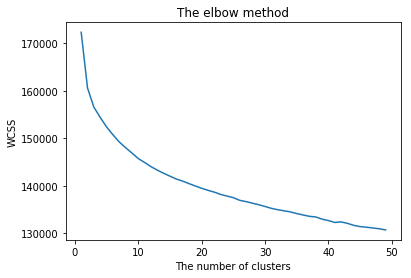

In [4]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,50), wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

#https://medium.com/@iSunilSV/data-science-python-k-means-clustering-eed68b490e02

In [5]:
print(len(X))

8117
